In [1]:
#As we dont have any GPU we will be using google collab for GPU usage
#Mout at drive 
import sys
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [91]:
!pip install chart-studio

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches

# plotly
from chart_studio import plotly as py
#import plotly.plotly as py
import plotly
import plotly.offline as pyo

from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode()
import plotly.graph_objs as go
import plotly.figure_factory as ff # import figure factory

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

Output hidden; open in https://colab.research.google.com to view.

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing"


In [4]:
df = pd.read_csv(path + '/dataset/created/cleaned_df.csv')

In [5]:

df =  shuffle(df).reset_index(drop=True)
df.head()

,text,label,cleaned_text
0,me walking into the office after pm some old l...,1,walk office pm old lady work office youre go w...
1,in this cbi vs cbi war it is the pm who is end...,0,cbi v cbi war pm end get expose control shakun...
2,its october nd and i havent watched any ghost ...,1,october nd havent watch ghost hunter ghost adv...
3,@GOP version of Scared Straight: Everyone’s l...,1,version scar straight everyones life hard look...
4,then i hate them too serious managers that be ...,1,hate serious manager want take job serious tim...


In [6]:
#removing shortwords
df.cleaned_text=df['cleaned_text'].astype(str)
tokenized_df=df['cleaned_text'].apply(lambda x: x.split())
tokenized_df.head(5)

0    [walk, office, pm, old, lady, work, office, yo...
1    [cbi, v, cbi, war, pm, end, get, expose, contr...
2    [october, nd, havent, watch, ghost, hunter, gh...
3    [version, scar, straight, everyones, life, har...
4    [hate, serious, manager, want, take, job, seri...
Name: cleaned_text, dtype: object

In [7]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,text,label,cleaned_text
0,me walking into the office after pm some old l...,1,walk office lady work office youre wrong shit ...
1,in this cbi vs cbi war it is the pm who is end...,0,expose control shakuni matter corruption invol...
2,its october nd and i havent watched any ghost ...,1,october havent watch ghost hunter ghost advent...
3,@GOP version of Scared Straight: Everyone’s l...,1,version scar straight everyones life hard look...
4,then i hate them too serious managers that be ...,1,hate serious manager want take serious time li...


In [8]:
df.shape

(49178, 3)

In [9]:

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['cleaned_text'].values.astype('U'))

In [10]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)



In [24]:
print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

(9836, 36461)

In [37]:
def plot_cm(y_true, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "magma", annot=annot, fmt='', ax=ax)

In [38]:
def Model(model,name):
    model.fit(X_train,y_train)
    cross = cross_val_score(model, X, y,n_jobs = -1,scoring = 'accuracy')
    print("Cross Validation score = ",cross)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    # cm = confusion_matrix(y_test,prediction)
    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))
    # print("confusion Matrix\n",cm)
    plot_cm(y_test, prediction)

**Complement Naive Bayes (CNB)**

Cross Validation score =  [0.83733225 0.84150061 0.84709231 0.84514489 0.84300966]
Complement Naive Bayes Trainng Score 0.8871689288800773

Complement Naive Bayes Testing Score 0.846177307848719



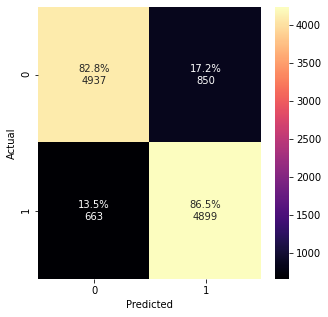

In [39]:

cnb = ComplementNB()
CNB_model = Model(cnb,"Complement Naive Bayes")

**MultinomialNB**

Cross Validation score =  [0.84404229 0.84821065 0.85410736 0.84870361 0.84748348]
Multinomial Naive Bayes Trainng Score 0.9076559402165625

Multinomial Naive Bayes Testing Score 0.8534973566490444



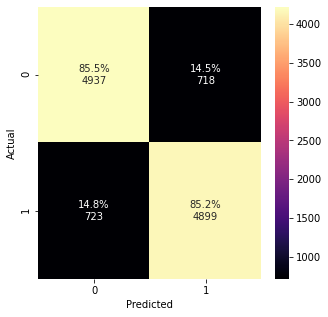

In [40]:

MNB = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
MNB_model = Model(MNB,"Multinomial Naive Bayes")

**SGDClassifier**

Cross Validation score =  [0.91093941 0.91642944 0.91215941 0.91154042 0.91306558]
SGD classifier Trainng Score 0.9492654160947588

SGD classifier Testing Score 0.9141927612850752



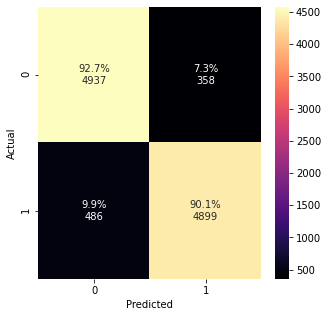

In [41]:

SGD = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
SGD_model = Model(SGD,"SGD classifier")

**LogisticRegression**

Cross Validation score =  [0.90982107 0.91429443 0.91256608 0.91032028 0.91235384]
Logistic Regression classifier Trainng Score 0.9491129073255046

Logistic Regression classifier Testing Score 0.9123627490849939



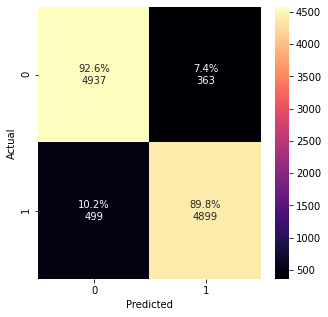

In [42]:

LR = LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
LR_model = Model(LR,"Logistic Regression classifier")

**RandomForest Classifier**

Cross Validation score =  [0.92364782 0.92954453 0.9299512  0.92221657 0.92963904]
Randomforrenst classifier Trainng Score 0.998068222256113

Randomforrenst classifier Testing Score 0.9294428629524197



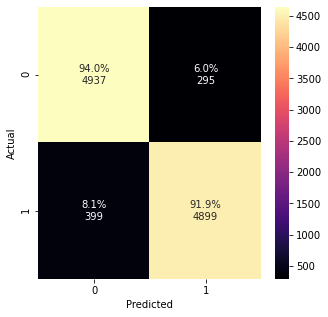

In [43]:

RF = RandomForestClassifier(n_estimators=200,criterion ='entropy')
RF_model = Model(RF,"Randomforrenst classifier")

**SVC**

Cross Validation score =  [0.91551444 0.91866612 0.91683611 0.91520081 0.91642095]
Support Vector classifier Trainng Score 0.9528747903004423

Support Vector classifier Testing Score 0.9188694591297275



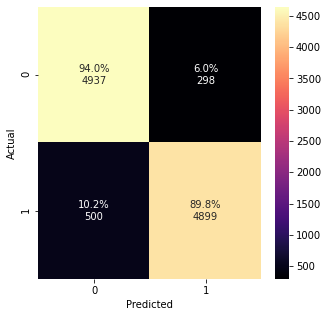

In [44]:

SVC = SVC(random_state=42)
SVC_model = Model(SVC,"Support Vector classifier")

In [47]:

MLA = {
     'Compliment Naive Bayes' : cnb,
     'Multinomial Naive Bayes' : MNB,
     'SGD Classifier' : SGD,
     'Logistic Regression' : LR,
     'Random Forrest' : RF,
     'SVC' : SVC,

}

In [49]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'micro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'micro')
    
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Train Accuracy,Test Accuracy,AUC,Precision,Recall,F1 Score
4,Random Forrest,0.9981,0.9294,0.929401,0.929443,0.929443,0.929428
5,SVC,0.9529,0.9189,0.918789,0.918869,0.918869,0.918821
2,SGD Classifier,0.9493,0.9142,0.914141,0.914193,0.914193,0.914168
3,Logistic Regression,0.9491,0.9124,0.912308,0.912363,0.912363,0.912335
1,Multinomial Naive Bayes,0.9077,0.8535,0.853493,0.853497,0.853497,0.853495
0,Compliment Naive Bayes,0.8872,0.8462,0.846248,0.846177,0.846177,0.846142


In [117]:
#plot comaparison 
def compare_plots(y_value):
  plt.subplots(figsize=(11,8))
  sns.barplot(x="Name", y=y_value ,data=compare,palette='hot',hue="Name",edgecolor=sns.color_palette('dark',7),dodge=False)
  plt.xticks(rotation=60)
  plt.title('Comparing techniques with '+y_value+'.')
  plt.legend(loc = 2, bbox_to_anchor = (1,1))
  # plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  plt.show()
  return plt

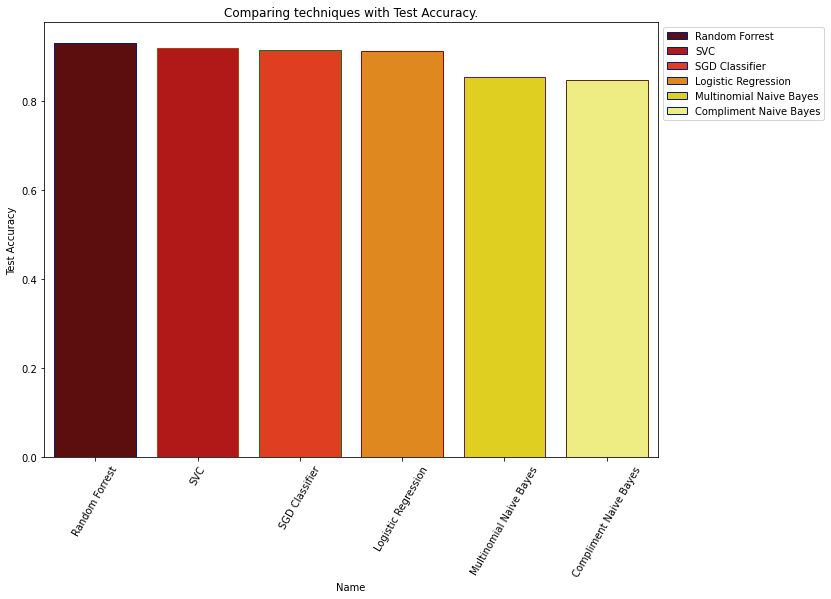

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [118]:
compare_plots("Test Accuracy")

In [108]:
# create trace1 
trace1 = go.Bar(
         x = np.array("Compliment Naive Bayes"),
         y = np.array(compare[compare["Name"] == 'Compliment Naive Bayes']['Test Accuracy']),
         name = "Compliment Naive Bayes",
         marker = dict(color ='rgba(255, 77, 77, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace2 
trace2 = go.Bar(
         x = np.array("Multinomial Naive Bayes"),
         y = np.array(compare[compare["Name"] == 'Multinomial Naive Bayes']['Test Accuracy']),
         name = "Multinomial Naive Bayes",
         marker = dict(color ='rgba(9, 220, 125, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace3 
trace3 = go.Bar(
         x = np.array("SGD Classifier"),
         y = np.array(compare[compare["Name"] == 'SGD Classifier']['Test Accuracy']),
         name = "SGD Classifier",
         marker = dict(color ='rgba(36, 44, 188, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace4 
trace4 = go.Bar(
         x = np.array("Random Forrest"),
         y = np.array(compare[compare["Name"] == 'Random Forrest']['Test Accuracy']),
         name = "Random Forrest",
         marker = dict(color ='rgba(209, 0, 224, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace5 
trace5 = go.Bar(
         x = np.array("Logistic Regression"),
         y = np.array(compare[compare["Name"] == 'Logistic Regression']['Test Accuracy']),
         name = "Logistic Regression",
         marker = dict(color ='rgba(0, 224, 209, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace6 
trace6 = go.Bar(
         x = np.array("SVC"),
         y = np.array(compare[compare["Name"] == 'SVC']['Test Accuracy']),
         name = "SVC",
         marker = dict(color ='rgba(255, 255, 61, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )

data = [trace1,trace2,trace3,trace4,trace5,trace6]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models Comparison")
fig = go.Figure(data = data, layout = layout)
fig.show(renderer="colab")